In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/thomasttam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Import Cleaned Data

In [2]:
data = pd.read_csv('cleaned_data.csv',index_col=0)
cleaned_data = data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19087 non-null  float64
 1   bedrooms       19087 non-null  int64  
 2   bathrooms      19087 non-null  float64
 3   sqft_living    19087 non-null  int64  
 4   sqft_lot       19087 non-null  int64  
 5   floors         19087 non-null  float64
 6   waterfront     19087 non-null  float64
 7   view           19087 non-null  float64
 8   condition      19087 non-null  int64  
 9   grade          19087 non-null  int64  
 10  sqft_above     19087 non-null  int64  
 11  sqft_basement  19087 non-null  float64
 12  yr_built       19087 non-null  int64  
 13  yr_renovated   19087 non-null  float64
 14  zipcode        19087 non-null  int64  
 15  lat            19087 non-null  float64
 16  long           19087 non-null  float64
 17  sqft_living15  19087 non-null  int64  
 18  sqft_l

In [4]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold
0,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,4,2014
1,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,2015
2,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,4,2014
3,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,2015
4,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2,2014


# 3. Feature Engineering

In addition to month_sold, year_sold, decade, and city we want to add new features to further increase the model.
* **total_sqft**: sqft_living + sqft_lot
* **total_sqft_inside**: sqft_above + sqft_basement
* **age_when_sold**: yr_sold - yr_built
* **age_after_renovated**: year_sold - yr_renovated
* **city**: location of the house based on zipcode

## Total Square Feet

Description: Total square feet of all property, house and lot

In [5]:
# create total_sqft column
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

total_sqft_values = data['total_sqft'].count()
total_sqft_nunique = data['total_sqft'].nunique()
total_sqft_missing_values = data['total_sqft'].isna().sum()

print(f'Number of values: {total_sqft_values}')
print(f'Number of unique values: {total_sqft_nunique}')
print(f'Missing values: {total_sqft_missing_values}')

Number of values: 19087
Number of unique values: 10322
Missing values: 0


## Total Square Feet Inside

Description: Total square feet of only the house

In [6]:
# create total_sqft_inside column
data['total_sqft_inside'] = data['sqft_above'] + data['sqft_basement']

total_sqft_inside_values = data['total_sqft_inside'].count()
total_sqft_inside_nunique = data['total_sqft_inside'].nunique()
total_sqft_inside_missing_values = data['total_sqft_inside'].isna().sum()

print(f'Number of values: {total_sqft_inside_values}')
print(f'Number of unique values: {total_sqft_inside_nunique}')
print(f'Missing values: {total_sqft_inside_missing_values}')

Number of values: 19087
Number of unique values: 990
Missing values: 0


In [7]:
pd.concat([data['total_sqft_inside'].value_counts(dropna=False),
           round((data['total_sqft_inside'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,total_sqft_inside,%
1300.0,125,0.65
1400.0,121,0.63
1440.0,120,0.63
1820.0,116,0.61
1320.0,113,0.59
...,...,...
3135.0,1,0.01
1767.0,1,0.01
1315.0,1,0.01
2253.0,1,0.01


## Age When Sold

Description: the age of the house when it was sold, year_sold - yr_built

In [8]:
data['age_when_sold'] = data['year_sold'] - data['yr_built']

age_when_sold_values = data['age_when_sold'].count()
age_when_sold_nunique = data['age_when_sold'].nunique()
age_when_sold_missing_values = data['age_when_sold'].isna().sum()

print(f'Number of values: {age_when_sold_values}')
print(f'Number of unique values: {age_when_sold_nunique}')
print(f'Missing values: {age_when_sold_missing_values}')

Number of values: 19087
Number of unique values: 117
Missing values: 0


In [9]:
pd.concat([data['age_when_sold'].value_counts(dropna=False),
           round((data['age_when_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,age_when_sold,%
9,423,2.22
0,388,2.03
8,383,2.01
11,375,1.96
10,367,1.92
...,...,...
113,26,0.14
115,20,0.10
81,19,0.10
80,18,0.09


## Age After Renovated

Description: age of the house after it was renovated, yr_sold - yr_renovated

In [10]:
data['age_after_renovated'] = data['year_sold'] - data['yr_renovated']

age_after_renovated_values = data['age_after_renovated'].count()
age_after_renovated_nunique = data['age_after_renovated'].nunique()
age_after_renovated_missing_values = data['age_after_renovated'].isna().sum()

print(f'Number of values: {age_after_renovated_values}')
print(f'Number of unique values: {age_after_renovated_nunique}')
print(f'Missing values: {age_after_renovated_missing_values}')

Number of values: 19087
Number of unique values: 70
Missing values: 0


In [11]:
pd.concat([data['age_after_renovated'].value_counts(dropna=False),
           round((data['age_after_renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,age_after_renovated,%
2014.0,12428,65.11
2015.0,6009,31.48
0.0,62,0.32
1.0,32,0.17
8.0,28,0.15
...,...,...
57.0,1,0.01
65.0,1,0.01
60.0,1,0.01
80.0,1,0.01


In [12]:
data['age_after_renovated'].describe()

count    19087.000000
mean      1946.347776
std        362.062271
min         -1.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: age_after_renovated, dtype: float64

In [13]:
# because year renovated has a lot of zero values meaning houses were not renovated, i was getting 2014 and 2015
# values which doesn't make sense. I converted the 2014 and 2015 values to -1 which will mean they were not renovated
data['age_after_renovated'] = data['age_after_renovated'].replace(2014,-1).replace(2015,-1)

In [14]:
pd.concat([data['age_after_renovated'].value_counts(dropna=False),
           round((data['age_after_renovated'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,age_after_renovated,%
-1.0,18443,96.63
0.0,62,0.32
1.0,32,0.17
8.0,28,0.15
10.0,26,0.14
...,...,...
64.0,1,0.01
66.0,1,0.01
61.0,1,0.01
57.0,1,0.01


## City

There are many unique values for zipcodes in which I decided to combine the zip codes by their city. I didn't have the zip code data for King County so I had to web scrape from zip-codes.com website to get the zip code and the respective city.

In [15]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.zip-codes.com/county/wa-king.asp#zipcodes'
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
tb = soup.find('table',class_='statTable')

list_zip_codes = []
for link in tb.find_all('td'):
    zip_code = link.find('a')
    if zip_code is None:
        continue
    list_zip_codes.append(zip_code.get_text('title'))

zip_code_df = pd.concat([pd.Series([list_zip_codes[i][-5:] for i in range(0,len(list_zip_codes),2)]).astype('int64'),
                         pd.Series([list_zip_codes[i] for i in range(1,len(list_zip_codes),2)])],axis=1).rename(columns={0:'zipcode',1:'city'})
zip_code_df.head()

,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [16]:
data = pd.merge(data,zip_code_df,on='zipcode',how='inner')

In [17]:
pd.concat([data['city'].value_counts(dropna=False),
           round((data['city'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,city,%
Seattle,7906,41.42
Renton,1394,7.30
Bellevue,1246,6.53
Kent,1075,5.63
Redmond,863,4.52
Kirkland,857,4.49
Auburn,814,4.26
Sammamish,704,3.69
Federal Way,692,3.63
Issaquah,663,3.47


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                19087 non-null  float64
 1   bedrooms             19087 non-null  int64  
 2   bathrooms            19087 non-null  float64
 3   sqft_living          19087 non-null  int64  
 4   sqft_lot             19087 non-null  int64  
 5   floors               19087 non-null  float64
 6   waterfront           19087 non-null  float64
 7   view                 19087 non-null  float64
 8   condition            19087 non-null  int64  
 9   grade                19087 non-null  int64  
 10  sqft_above           19087 non-null  int64  
 11  sqft_basement        19087 non-null  float64
 12  yr_built             19087 non-null  int64  
 13  yr_renovated         19087 non-null  float64
 14  zipcode              19087 non-null  int64  
 15  lat                  19087 non-null 

# Model w/ Added Feature Engineering

In [19]:
import statsmodels.api as sm

y = data['price']
# Take out price, objects, and columns with null values
x = data.drop(['price','city'], axis=1)
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              8610.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                        0.00
Time:                        21:10:12   Log-Likelihood:                     -2.6038e+05
No. Observations:               19087   AIC:                                  5.208e+05
Df Residuals:                   19066   BIC:                                  5.210e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms            -3.799e+04   2038.933    -18.630      0.000    -4.2e+04    -3.4e+04
bathrooms            4.231e+04   3515.371     12.036      0.000    3.54e+04    4.92e+04
sqft_living            77.9253     12.728      6.122      0.000      52.977     102.874
sqft_lot              -38.9097      6.364     -6.114      0.000     -51.384     -26.435
floors               9013.2806   3867.504      2.331      0.020    1432.631    1.66e+04
waterfront           6.293e+05   1.86e+04     33.864      0.000    5.93e+05    6.66e+05
view                 5.057e+04   2306.708     21.925      0.000    4.61e+04    5.51e+04
condition             2.74e+04   2524.512     10.855      0.000    2.25e+04    3.24e+04
grade                9.633e+04   2322.287     41.483      0.000    9.18e+04    1.01e+05
sqft_above             33.8809      6.793      4.988      0.000      20.566      47.196
sqft_basement           3.4688      6.623      0.524      0.600      -9.513      16.451
yr_built              401.5673    480.356      0.836      0.403    -539.973    1343.108
yr_renovated           48.6841      6.491      7.500      0.000      35.961      61.408
zipcode              -645.1784     34.246    -18.839      0.000    -712.305    -578.052
lat                  6.033e+05   1.15e+04     52.264      0.000    5.81e+05    6.26e+05
long                -2.113e+05   1.41e+04    -14.963      0.000   -2.39e+05   -1.84e+05
sqft_living15          16.4450      3.701      4.444      0.000       9.191      23.699
sqft_lot15             -0.3954      0.078     -5.051      0.000      -0.549      -0.242
quarter_sold        -6314.2267   1508.831     -4.185      0.000   -9271.670   -3356.784
year_sold            3549.4098    981.708      3.616      0.000    1625.176    5473.644
total_sqft             39.0156      6.364      6.130      0.000      26.541      51.490
total_sqft_inside      37.3498     12.568      2.972      0.003      12.716      61.984
age_when_sold        3147.8425    504.058      6.245      0.000    2159.845    4135.840
age_after_renovated -2999.7285    508.967     -5.894      0.000   -3997.348   -2002.109
==============================================================================
Omnibus:                    16432.993   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1713267.280
Skew:                           3.629   Prob(JB):                         0.00
Kurtosis:                      48.843   Cond. No.                     3.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 

# 4. Check Multicollinearity

In [20]:
pd.set_option('display.max_columns',100)
data_corr = data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,total_sqft,total_sqft_inside,age_when_sold,age_after_renovated
price,1.000000,0.309924,0.526786,0.704079,0.085975,0.256381,0.276849,0.393022,0.036459,0.666206,0.608251,0.321058,0.050861,0.111388,-0.048067,0.304657,0.019184,0.580673,0.080577,-0.006741,0.003463,0.101436,0.702235,-0.050801,0.063880
bedrooms,0.309924,1.000000,0.516796,0.578762,0.029517,0.182245,-0.002480,0.083682,0.024367,0.361043,0.481102,0.296432,0.157172,0.016094,-0.152724,-0.012836,0.131543,0.394386,0.027755,-0.004136,-0.009177,0.042396,0.575715,-0.157304,-0.008374
bathrooms,0.526786,0.516796,1.000000,0.756165,0.084703,0.505518,0.067293,0.185397,-0.128827,0.666730,0.687808,0.278254,0.506162,0.043605,-0.201382,0.024355,0.222294,0.569531,0.085618,0.010772,-0.027544,0.101339,0.753618,-0.506557,-0.000565
sqft_living,0.704079,0.578762,0.756165,1.000000,0.172611,0.356144,0.110329,0.284554,-0.059296,0.763840,0.877586,0.427994,0.316068,0.045628,-0.195603,0.052232,0.238001,0.755439,0.182441,0.014670,-0.029790,0.194361,0.996375,-0.316514,0.017155
sqft_lot,0.085975,0.029517,0.084703,0.172611,1.000000,-0.007760,0.023107,0.070931,-0.014634,0.113859,0.183564,0.014081,0.055533,0.002824,-0.129755,-0.086333,0.230078,0.145537,0.722913,-0.004807,0.006799,0.999755,0.172409,-0.055420,0.010818
floors,0.256381,0.182245,0.505518,0.356144,-0.007760,1.000000,0.021678,0.027826,-0.266208,0.457357,0.524547,-0.239202,0.489824,-0.000662,-0.058049,0.050382,0.126688,0.279769,-0.011296,0.015473,-0.020938,0.000271,0.359317,-0.490115,-0.005544
waterfront,0.276849,-0.002480,0.067293,0.110329,0.023107,0.021678,1.000000,0.405954,0.017587,0.087488,0.075437,0.088440,-0.026375,0.079307,0.031303,-0.012873,-0.040109,0.088948,0.031959,0.008867,-0.005548,0.025490,0.110296,0.026284,0.089659
view,0.393022,0.083682,0.185397,0.284554,0.070931,0.027826,0.405954,1.000000,0.046754,0.247029,0.167830,0.273642,-0.057522,0.088696,0.089468,0.010181,-0.078307,0.275111,0.071054,-0.006547,-0.000327,0.077030,0.282072,0.057512,0.079131
condition,0.036459,0.024367,-0.128827,-0.059296,-0.014634,-0.266208,0.017587,0.046754,1.000000,-0.147443,-0.158347,0.168175,-0.364623,-0.055131,0.002388,-0.018588,-0.106632,-0.094346,-0.005978,0.017638,-0.046482,-0.015905,-0.062672,0.363852,-0.008424
grade,0.666206,0.361043,0.666730,0.763840,0.113859,0.457357,0.087488,0.247029,-0.147443,1.000000,0.757576,0.165692,0.444846,0.011633,-0.182216,0.114645,0.196562,0.713351,0.119801,0.009787,-0.029005,0.130547,0.762876,-0.445269,-0.019840


In [21]:
data_corr_boolean = abs(data.corr()) > 0.75
data_corr_boolean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,total_sqft,total_sqft_inside,age_when_sold,age_after_renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


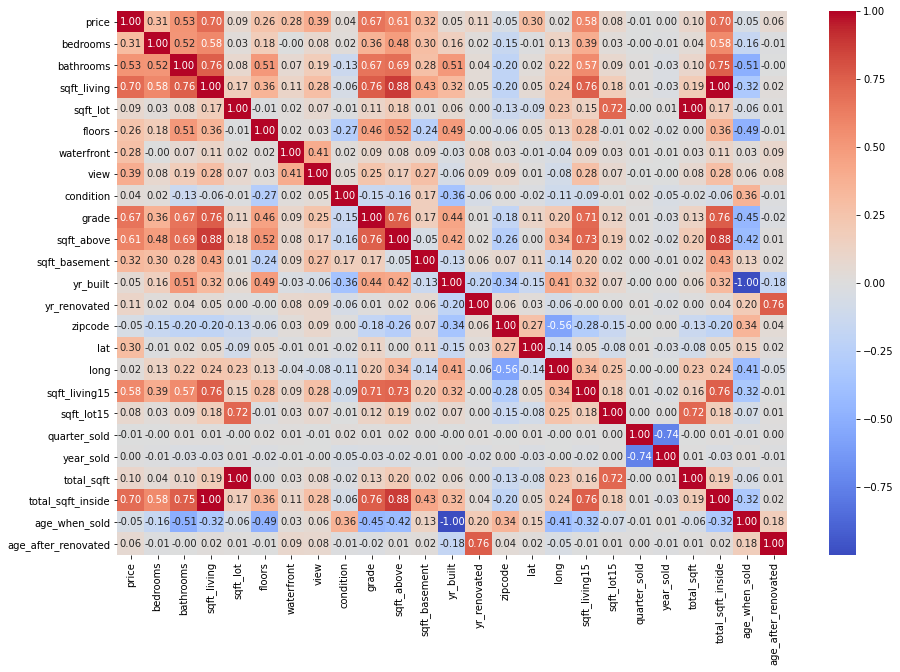

In [22]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Detecting Multicollinearity with VIF

* https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
* "VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable."
* "VIF score of an independent variable represents how well the variable is explained by other independent variables."

In [115]:
# function to calculate the VIF scores
# https://www.displayr.com/variance-inflation-factors-vifs/
    # value of 1 - 3: none or low
    # value of 4 - 5: moderate to high
    # value of 10 or more: very high
    
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"]
    return(vif)

In [112]:
# drop price which is target variable and city since it's an object
data_vif = data.drop(['price','city'],axis=1)

pd.set_option('display.max_rows',100)
pd.set_option('display.float_format',lambda x: '%.5f' % x)
calc_vif(data_vif)

,variables,VIF
0,bedrooms,23.49579
1,bathrooms,28.96593
2,sqft_living,inf
3,sqft_lot,inf
4,floors,17.46555
5,waterfront,1.21823
6,view,1.56049
7,condition,35.43343
8,grade,149.53776
9,sqft_above,inf


In [113]:
# removed all the columns that are infinity meaning there is an exact linear combination of other variables
# also removed high VIF scores greater than 10
data_vif = data_vif.drop(['sqft_living','total_sqft_inside','yr_renovated','sqft_lot15','sqft_living15',
                          'year_sold','age_when_sold','yr_built','sqft_lot','sqft_above','zipcode','lat','long',
                         'bedrooms','bathrooms','floors','condition','grade'],
                         axis=1)

In [106]:
# results after we removed the collinear variables
calc_vif(data_vif)

,variables,VIF
0,waterfront,1.21209
1,view,1.40946
2,sqft_basement,1.46904
3,quarter_sold,1.47372
4,total_sqft,1.15648
5,age_after_renovated,1.01475


In [114]:
data_vif_corr = data_vif.corr()
data_vif_corr = abs(data.corr()) > 0.75

,waterfront,view,sqft_basement,quarter_sold,total_sqft,age_after_renovated
waterfront,1.00000,0.40595,0.08844,0.00887,0.02549,0.08966
view,0.40595,1.00000,0.27364,-0.00655,0.07703,0.07913
sqft_basement,0.08844,0.27364,1.00000,0.00266,0.02364,0.01813
quarter_sold,0.00887,-0.00655,0.00266,1.00000,-0.00446,0.00392
total_sqft,0.02549,0.07703,0.02364,-0.00446,1.00000,0.01116
age_after_renovated,0.08966,0.07913,0.01813,0.00392,0.01116,1.00000


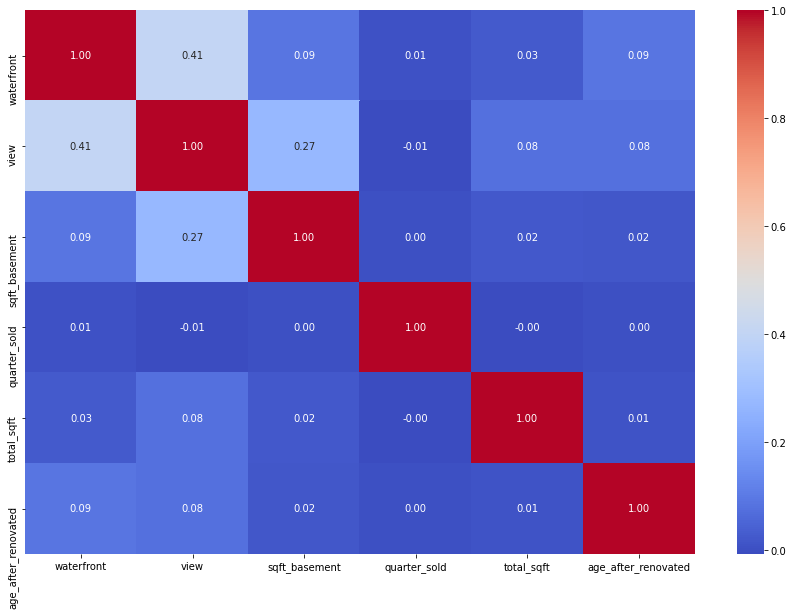

In [108]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data_vif_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [116]:
data = data_vif

In [117]:
data.head()

,waterfront,view,sqft_basement,quarter_sold,total_sqft,age_after_renovated
0,0.00000,0.00000,400.00000,4,9812,23.00000
1,0.00000,0.00000,500.00000,2,10557,-1.00000
2,0.00000,0.00000,0.00000,2,7594,-1.00000
3,0.00000,0.00000,0.00000,3,5630,-1.00000
4,0.00000,0.00000,1200.00000,3,9340,-1.00000


# 4. Remove Outliers

In [1357]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,grade_binned,total_sqft,total_sqft_inside,age_when_sold,age_after_renovated,city,decade_built
0,6414100192,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,0.000000,3,7,2170,400.000000,1951,1991.000000,98125,47.721000,-122.319000,1690,7639,4,2014,Fair,9812,2570.000000,63,23.000000,Seattle,1950
1,8820901275,571000.000000,4,2.000000,2750,7807,1.500000,0.000000,0.000000,5,7,2250,500.000000,1916,0.000000,98125,47.716800,-122.287000,1510,7807,2,2014,Fair,10557,2750.000000,98,-1.000000,Seattle,1910
2,1133000671,315000.000000,3,1.000000,960,6634,1.000000,0.000000,0.000000,3,6,960,0.000000,1952,0.000000,98125,47.726400,-122.310000,1570,7203,2,2014,Fair,7594,960.000000,62,-1.000000,Seattle,1950
3,3992700335,382500.000000,2,1.000000,1190,4440,1.000000,0.000000,0.000000,3,6,1190,0.000000,1981,0.000000,98125,47.713500,-122.287000,1060,5715,3,2014,Fair,5630,1190.000000,33,-1.000000,Seattle,1980
4,6414100671,425000.000000,3,1.750000,2500,6840,1.000000,0.000000,0.000000,3,8,1300,1200.000000,1957,0.000000,98125,47.722200,-122.320000,1580,8691,3,2014,Fair,9340,2500.000000,57,-1.000000,Seattle,1950


In [1358]:
data.shape

(19087, 29)

In [1359]:
# identify outliers with standard deviation
# generate univariate observations
def remove_outliers(column):
    # calculate summary statistics
    data_mean, data_std = mean(column), std(column)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in column if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in column if x >= lower and x <= upper]
    return pd.Series(outliers_removed)

In [1360]:
a = remove_outliers(data['sqft_living'])

In [1361]:
a.describe().apply(lambda x: format(x, 'f'))

count    18868.000000
mean      2040.769716
std        822.822224
min        370.000000
25%       1420.000000
50%       1900.000000
75%       2530.000000
max       4850.000000
dtype: object

In [1362]:
data['sqft_living'].describe().apply(lambda x: format(x, 'f'))

count    19087.000000
mean      2084.841096
std        923.046632
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: object

In [1363]:
b = remove_outliers(data['price'])
b.describe().apply(lambda x: format(x, 'f'))

count      18741.000000
mean      509767.988848
std       262081.237953
min        78000.000000
25%       320000.000000
50%       450000.000000
75%       630000.000000
max      1660000.000000
dtype: object

In [1364]:
data['price'].describe().apply(lambda x: format(x, 'f'))

count      19087.000000
mean      542928.793367
std       372405.882405
min        78000.000000
25%       324405.000000
50%       452000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

# 3. Categorical Data

In [1365]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'quarter_sold', 'year_sold',
       'grade_binned', 'total_sqft', 'total_sqft_inside', 'age_when_sold',
       'age_after_renovated', 'city', 'decade_built'],
      dtype='object')

In [1366]:
continuous = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15',
              'sqft_lot15']
discrete = ['id','bedrooms','bathrooms','floors','view','yr_built']
categorical = ['waterfront','condition','grade','zipcode','quarter_sold','year_sold']

In [1367]:
# a reminder to see what data types we're working with (taken from data cleaning notebook)
continuous = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15',
              'sqft_lot15']
discrete = ['id','bedrooms','bathrooms','floors','view','yr_built']
categorical = ['waterfront','condition','grade','zipcode','quarter_sold','year_sold']

In [1368]:
# convert columns in categorical to category data type
for col in categorical:
    data[col] = data[col].astype('category')

In [1369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   19087 non-null  int64   
 1   price                19087 non-null  float64 
 2   bedrooms             19087 non-null  int64   
 3   bathrooms            19087 non-null  float64 
 4   sqft_living          19087 non-null  int64   
 5   sqft_lot             19087 non-null  int64   
 6   floors               19087 non-null  float64 
 7   waterfront           19087 non-null  category
 8   view                 19087 non-null  float64 
 9   condition            19087 non-null  category
 10  grade                19087 non-null  category
 11  sqft_above           19087 non-null  int64   
 12  sqft_basement        19087 non-null  float64 
 13  yr_built             19087 non-null  int64   
 14  yr_renovated         19087 non-null  float64 
 15  zipcode            

# 2. Binning Categorical Data

To deal with categorical data and the amount of levels it can produce, I decided to reduce the amount of levels by combining the levels of the categorical variables. This will reduce the number of levels and potentially improve the model performance as well.

## Decade Built

Bins the year built into respective decade.

In [1445]:
# bins the year by the decade
data['decade_built'] = pd.cut(x = data['yr_built'],
                        bins=[decade for decade in range(1899,2020,10)],
                        labels=[i for i in range(1900,2020,10)])

In [1446]:
pd.concat([data['decade_built'].value_counts(dropna=False),
           round((data['decade_built'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,decade_built,%
2000,3114,16.310000
1960,2326,12.190000
1950,2162,11.330000
1980,2033,10.650000
1970,2015,10.560000
1990,1992,10.440000
1940,1528,8.010000
2010,1105,5.790000
1920,1051,5.510000
1910,710,3.720000


In [1447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   19087 non-null  int64   
 1   price                19087 non-null  float64 
 2   bedrooms             19087 non-null  int64   
 3   bathrooms            19087 non-null  float64 
 4   sqft_living          19087 non-null  int64   
 5   sqft_lot             19087 non-null  int64   
 6   floors               19087 non-null  float64 
 7   waterfront           19087 non-null  float64 
 8   view                 19087 non-null  float64 
 9   condition            19087 non-null  int64   
 10  grade                19087 non-null  int64   
 11  sqft_above           19087 non-null  int64   
 12  sqft_basement        19087 non-null  float64 
 13  yr_built             19087 non-null  int64   
 14  yr_renovated         19087 non-null  float64 
 15  zipcode            

## Grade

Grade is a continuous variable and it's better to reduce the number of categorical values. I decided to bin the grade to 4 different groups: 0-5 (poor), 5-8 (fair), 8-11 (good), 11-13(high) and drop the grade column.

In [1407]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [1408]:
# bin each category
# 0 - 5 (poor)
# 5 - 8 (fair)
# 8 - 11 (good)
# 11 - 13 (high)
data['grade_binned'] = pd.cut(data['grade'],[0,5,8,11,13],labels=['Poor','Fair','Good','High'])

In [1409]:
pd.concat([data['grade_binned'].value_counts(dropna=False),
           round((data['grade_binned'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)                

,grade_binned,%
Fair,15078,79.000000
Good,3682,19.290000
Poor,233,1.220000
High,94,0.490000


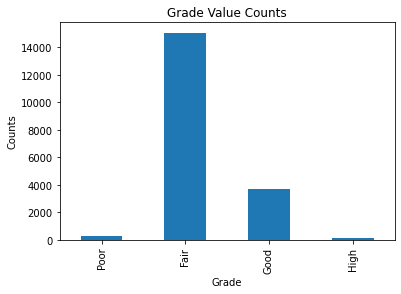

In [1410]:
# display bar graph with the grade binned values and their counts
data['grade_binned'].value_counts().loc[['Poor','Fair','Good','High']].plot(kind='bar').set_title('Grade Value Counts')
plt.xlabel('Grade')
plt.ylabel('Counts')
plt.show()

# 6. Dummy Variables

Categorical variables need to be transformed which I created dummy variables for each of the categorical columns. I first created a separate dataframe for the dummies and then concatenated with the original dataset.

In [1370]:
# reminder of the data types
numerical = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above', 
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 
             'total_sqft', 'total_sqft_inside', 'age_when_sold', 'age_after_renovated']
categorical = ['waterfront', 'condition', 'grade', 'grade_binned',
               'quarter_sold', 'year_sold', 'city', 'decade_built']

In [1371]:
# create dummies into a single dataframe
# drop_first is to avoid the dummy variable trap of multicollinearity
    # you can perfectly predict what one variable will be using some combination of the other variables
dummy_data = pd.get_dummies(data[categorical],prefix=categorical,drop_first=True)

In [1372]:
dummy_data.shape

(19087, 56)

In [1373]:
dummy_data.head()

,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,grade_binned_Fair,grade_binned_Good,grade_binned_High,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1374]:
# combine dummy data with original dataframe
data = pd.concat([data,dummy_data],axis=1)

In [1375]:
# drop categorical columns since we created the dummy variables
data = data.drop(columns=['waterfront', 'condition', 'grade', 'grade_binned',
               'quarter_sold', 'year_sold', 'city', 'decade_built'])

In [1376]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,age_after_renovated,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,grade_binned_Fair,grade_binned_Good,grade_binned_High,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010
0,6414100192,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,2170,400.000000,1951,1991.000000,98125,47.721000,-122.319000,1690,7639,9812,2570.000000,63,23.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,8820901275,571000.000000,4,2.000000,2750,7807,1.500000,0.000000,2250,500.000000,1916,0.000000,98125,47.716800,-122.287000,1510,7807,10557,2750.000000,98,-1.000000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1133000671,315000.000000,3,1.000000,960,6634,1.000000,0.000000,960,0.000000,1952,0.000000,98125,47.726400,-122.310000,1570,7203,7594,960.000000,62,-1.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3992700335,382500.000000,2,1.000000,1190,4440,1.000000,0.000000,1190,0.000000,1981,0.000000,98125,47.713500,-122.287000,1060,5715,5630,1190.000000,33,-1.000000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6414100671,425000.000000,3,1.750000,2500,6840,1.000000,0.000000,1300,1200.000000,1957,0.000000,98125,47.722200,-122.320000,1580,8691,9340,2500.000000,57,-1.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# 6. Second Model

**Changes compared to first Preliminary Model**
    * Added Feature Engineering
    * Removed Outliers
    * Dummy Variables for categorical columns

In [1377]:
import statsmodels.api as sm

y = data['price']
# Take out price, objects, and columns with null values
x = data.drop(['price'], axis=1)
linreg = sm.OLS(y, x).fit()
linreg.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [1547]:
df_vif = data.drop(['price'],axis=1)
df_vif.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,total_sqft,total_sqft_inside,age_when_sold,age_after_renovated,city
0,3,2.250000,2570,7242,2.000000,0.000000,0.000000,3,7,2170,400.000000,1951,1991.000000,98125,47.721000,-122.319000,1690,7639,4,2014,9812,2570.000000,63,23.000000,Seattle
1,4,2.000000,2750,7807,1.500000,0.000000,0.000000,5,7,2250,500.000000,1916,0.000000,98125,47.716800,-122.287000,1510,7807,2,2014,10557,2750.000000,98,-1.000000,Seattle
2,3,1.000000,960,6634,1.000000,0.000000,0.000000,3,6,960,0.000000,1952,0.000000,98125,47.726400,-122.310000,1570,7203,2,2014,7594,960.000000,62,-1.000000,Seattle
3,2,1.000000,1190,4440,1.000000,0.000000,0.000000,3,6,1190,0.000000,1981,0.000000,98125,47.713500,-122.287000,1060,5715,3,2014,5630,1190.000000,33,-1.000000,Seattle
4,3,1.750000,2500,6840,1.000000,0.000000,0.000000,3,8,1300,1200.000000,1957,0.000000,98125,47.722200,-122.320000,1580,8691,3,2014,9340,2500.000000,57,-1.000000,Seattle


In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.float_format',lambda x: '%.6f' % x)

In [ ]:
# first thing I dropped because it was feature I created which was created from 
# sqft_living and sqft_lot so that explains the high correlation
# df_vif = df_vif.drop(['total_sqft'],axis=1)
# df_vif = df_vif.drop(['sqft_basement'],axis=1)
# df_vif = df_vif.drop(['sqft_living'],axis=1)

# df_vif = df_vif.drop(['grade_7'],axis=1)
# df_vif = df_vif.drop(['grade_9'],axis=1)
# df_vif = df_vif.drop(['grade_12'],axis=1)

# df_vif = df_vif.drop(['grade_binned_Fair'],axis=1)
# df_vif = df_vif.drop(['age_when_sold'],axis=1)
# df_vif = df_vif.drop(['age_when_sold'],axis=1)

df_vif = df_vif.drop(['grade_binned_Fair'],axis=1)
df_vif = df_vif.drop(['grade_binned_Good'],axis=1)

In [ ]:
* **total_sqft**: sqft_living + sqft_lot
* **total_sqft_inside**: sqft_above + sqft_basement
* **age_when_sold**: yr_sold - yr_built
* **age_after_renovated**: year_sold - yr_renovated
* **city**: location of the house based on zipcode
* **decade_built**: decade of when the house was built

In [ ]:
calc_vif(df_vif)

### Linearity Assumption

We want to check if each predictor and the target variables are both linear with each other.

In [ ]:
for i, col in enumerate(data.columns):
    print(col)
#     plt.figure()
#     plt.ticklabel_format(useOffset=False, style='plain')
#     sns.distplot(data[col])
    

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
# sqft_lot, floors, view, sqft_basement, yr_built, 
# yr_renovated, zipcode, sqft_lot15, yr_sold, age_when_sold, total_sqft, and last_updated.

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'], label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
#     ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()